In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
! pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
data=pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [59]:
data.shape

(4600, 18)

In [60]:
data.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
pd.isnull(data).sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [62]:
print(data.isnull().sum().sum())

0


In [92]:
A=data.select_dtypes(include='number').corr()
A

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


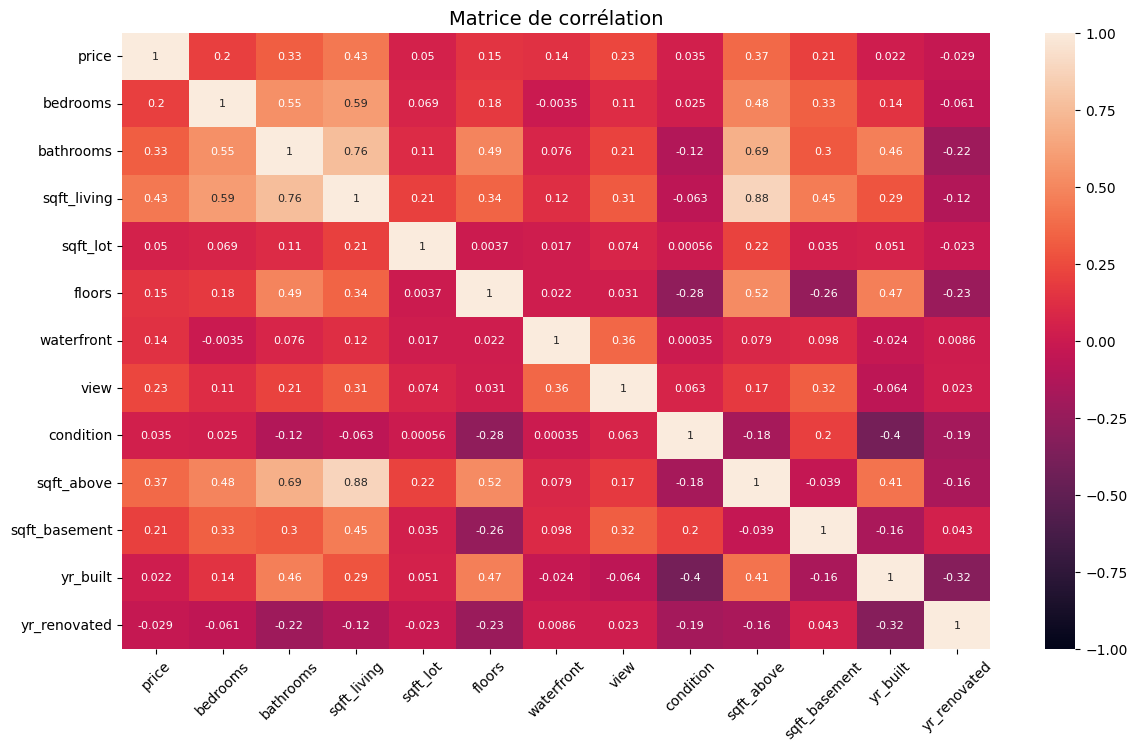

In [115]:
plt.figure(figsize=(14,8))
sns.heatmap(A,annot=True, 
            annot_kws={"size": 8},
            vmin=-1,
            vmax=1)
plt.title("Matrice de corrélation", fontsize=14)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()


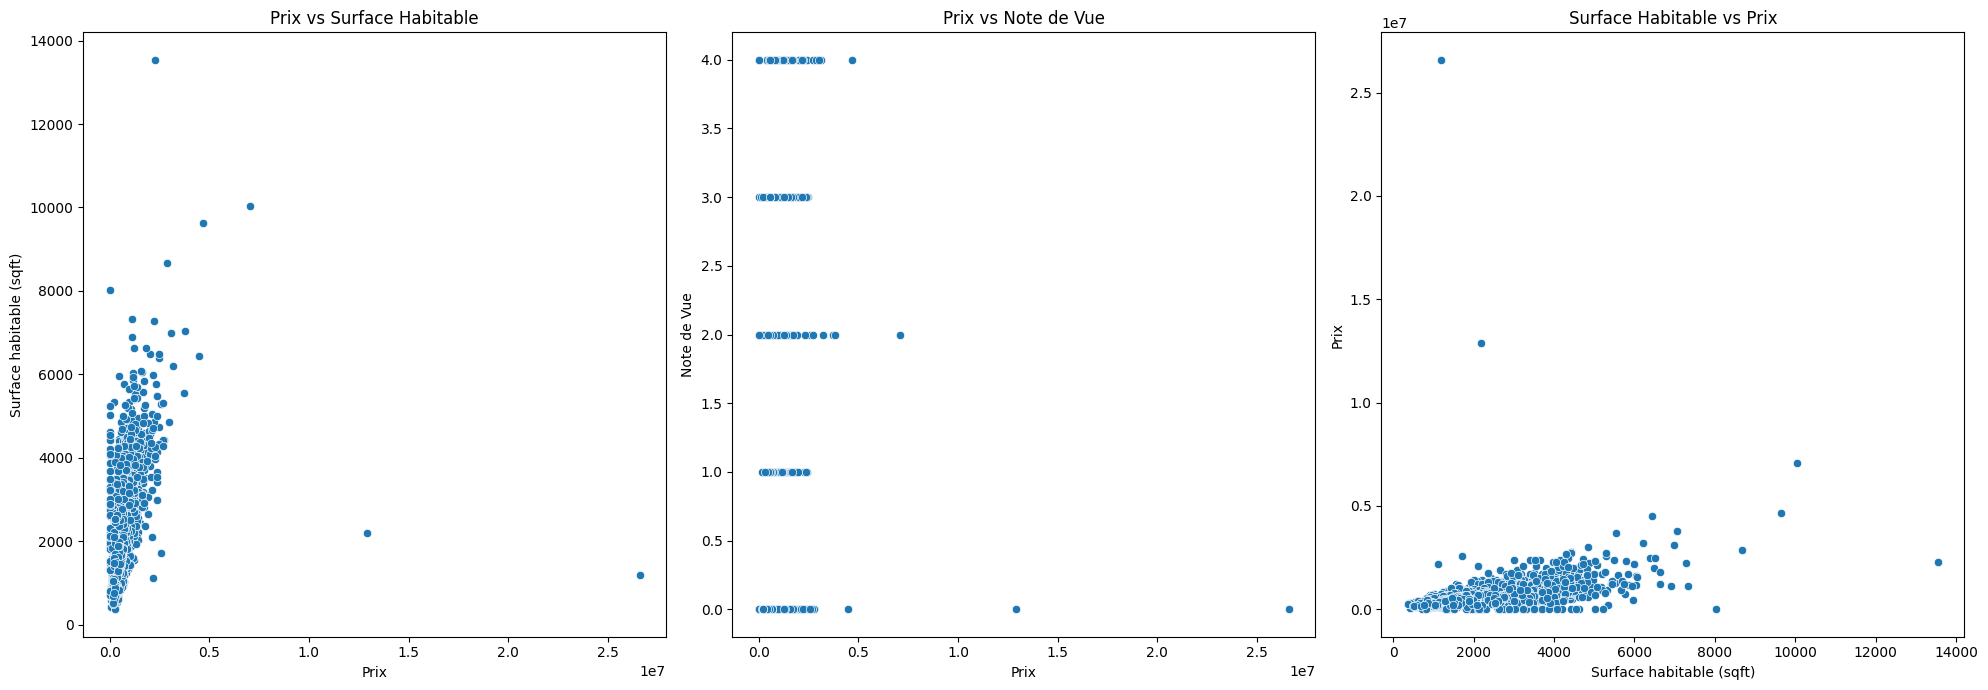

In [135]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.scatterplot(data,x="price",y="sqft_living")
plt.title("Prix vs Surface Habitable")
plt.xlabel("Prix")
plt.ylabel("Surface habitable (sqft)")
plt.subplot(1,3,2)
sns.scatterplot(data,x="price",y="view")
plt.title("Prix vs Note de Vue")
plt.xlabel("Prix")
plt.ylabel("Note de Vue")
plt.subplot(1,3,3)
sns.scatterplot(data,x="sqft_living",y="price")
plt.title("Surface Habitable vs Prix")
plt.xlabel("Surface habitable (sqft)")
plt.ylabel("Prix")
plt.tight_layout()
plt.show()

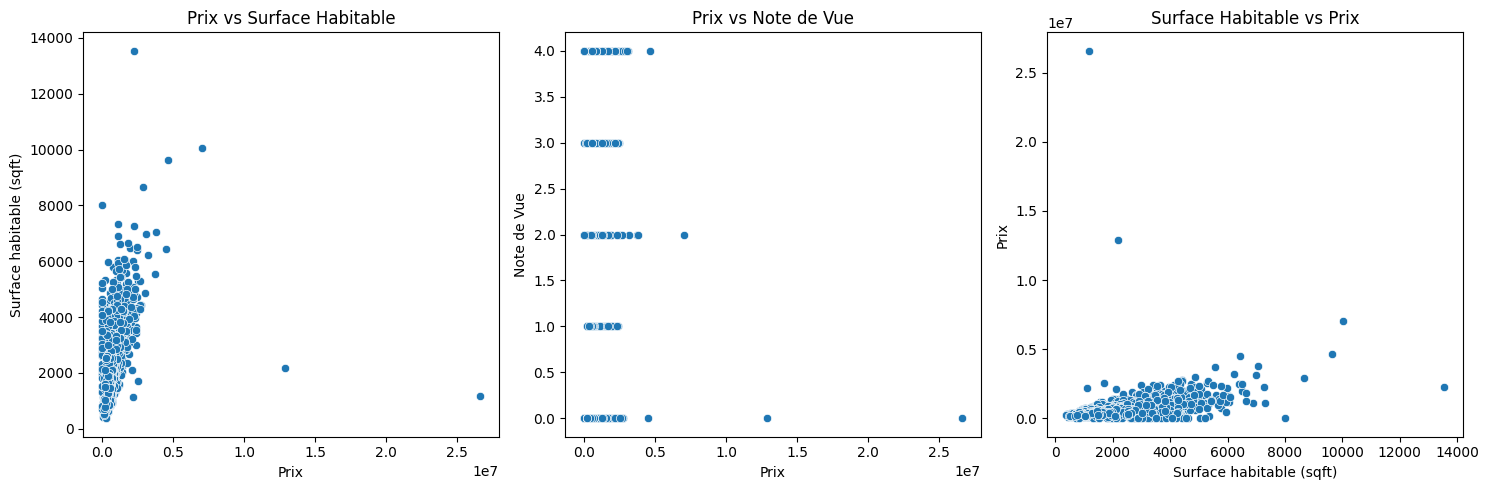

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Scatterplot 1: price vs sqft_living
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x="price", y="sqft_living")
plt.title("Prix vs Surface Habitable")
plt.xlabel("Prix")
plt.ylabel("Surface habitable (sqft)")

# Scatterplot 2: price vs view
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x="price", y="view")
plt.title("Prix vs Note de Vue")
plt.xlabel("Prix")
plt.ylabel("Note de Vue")

# Scatterplot 3: sqft_living vs price
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x="sqft_living", y="price")
plt.title("Surface Habitable vs Prix")
plt.xlabel("Surface habitable (sqft)")
plt.ylabel("Prix")

plt.tight_layout()
plt.show()


<Axes: xlabel='sqft_living', ylabel='price'>

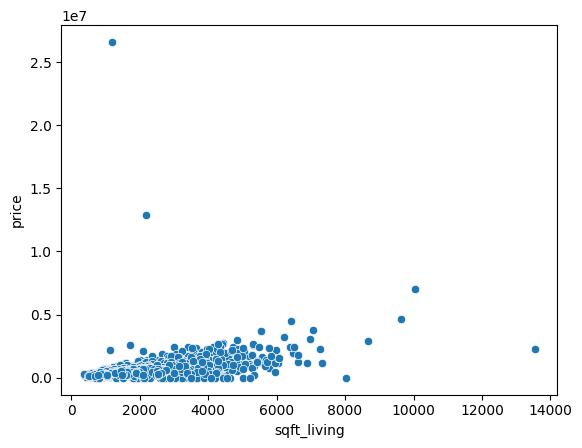

In [117]:
sns.scatterplot(data,x="sqft_living",y="price")

Ici montre qu il y une forte relation avec price et sqft_living sqft_lot bedromms bathrooms aussi

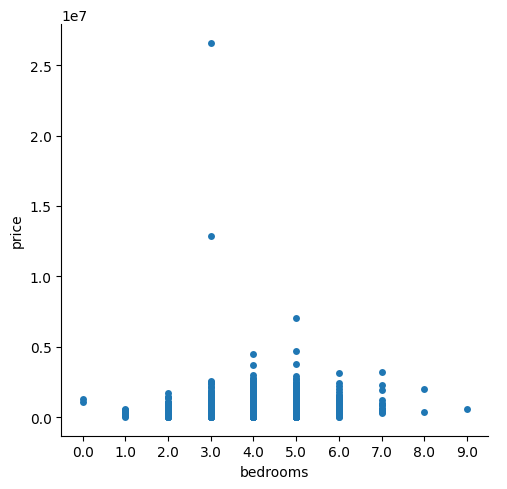

In [114]:
sns.catplot(data=data, x="bedrooms", y="price", jitter=False)
plt.show()